# Pandas Tutorial


<em> <p style = "text-indent:10em">  Brandon Rhodes, PyCon15 </p> </em>

[GitHub](https://github.com/brandon-rhodes/pycon-pandas-tutorial.git)


[Data](pages.stern.nyu.edu/~dbackus/csv/)


[Pandas API](http://pandas.pydata.org/pandas-docs/stable/api.html)

In [41]:
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn

# pd display option
pd.options.display.max_columns = 6
pd.options.display.max_rows = 25

from IPython.core.display import HTML

css = open('style-table.css').read() + open('custom.css').read()
HTML('<style>{}</style>'.format(css))
# + open('pycon-pandas-tutorial/style-notebook.css').read()

To change the display of the pandas output 

## Series

Series are list/1D array like objects

In [1]:
s = pd.Series([1,2,3,4,5])
s

In [26]:
titles = pd.DataFrame.from_csv(
    'pycon-pandas-tutorial/titles.csv', 
    index_col = None, 
    encoding = 'utf-8')
titles

,title,year
0,Orlando Vargas,2005
1,Niu-Peng,1989
2,Anandabhadram,2005
3,Mahendra Varma,1993
4,Beomdiga shidae,1970
5,100Volta,2009
6,Atakku no. 1,1970
7,Uroki v kontse vesny,1991
8,Un sac de billes,1975
9,The Trouble with Men and Women,2005


In [14]:
titles.unstack().unstack()

,0,1,2,...,214588,214589,214590
title,Orlando Vargas,Niu-Peng,Anandabhadram,...,Karibal ko ang aking ina,Under Heaven,Gosokdoro
year,2005,1989,2005,...,1982,2015,1987


In [21]:
cast = pd.DataFrame.from_csv(
    'pycon-pandas-tutorial/cast.csv',
    index_col = None,
    encoding = 'utf-8')
cast.head(10)

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN
5,Townbiz,2010,Too $hort,actor,Himself,NaN
6,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
7,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN
8,When the Man Went South,2014,Taipaleti 'Atu'ake,actor,Two Palms - Ua'i Paame,8
9,Little Angel (Angelita),2015,Michael 'babeepower' Viera,actor,Chico,9


In [ ]:
len(titles), list(titles)

You may see some Jump/Hitch in notebook whenever a cell with existing ouput is ran. When a cell is executed (Shift/Ctrl+Enter), Ipython notebook discards the existing output. DOM of the browser kicks in clearing the bottom screen and scrolls up, since there is no need for that extra blank space. Ipython then produces a new output which falls below the view scope.

## head and tail 

slices and creates a new DataFrame

In [ ]:
h = titles.head(10)
h

## Series, Filtering

In [ ]:
h['title']
h.title

In [ ]:
h[['title', 'year']] 
# Note the [] inside [];  returns only the chosen colums

Mathermatical operations can be performed on a **Series**

In [ ]:
h['year'] // 10 + 1000

## Sorting

DataFrame can be "sorted", Series can be "ordered"

In [ ]:
h['year'].order()

In [ ]:
# Comparison operator returns boolean (True|False)

h['year'] > 1985

In [ ]:
h[h['year'] < 1985]

#The output of the Series (boolean) is fed into the DataFrame. 
#Only the True values of DF is returned

### Gotcha 1

`h[h['year'] < 1985 and h['year'] >= 1990]` will throw an Exception error: The truth value of a Series is ambiguous.

`and` in this scenario proceeds by two steps: 
    
    STEP1: Compare the left argument 
    `h['year'] < 1985` to be True or False.
    
    STEP2: Move on and compare right argument 
    `h['year'] >= 1990`.

`and` can compare only single value not a Series/list of values.

#### Solution

**`&`** is a bitwise opertor of `and`. It can compare a list of bits against other.

The only problem is operator precedence (PEMDAS :)). For an input 

<pre><code>`h[h['year'] < 1985 & h['year'] >= 1990]` </code></pre>


**`&`** first compares '1990' and 'h.year' first and then compares the outer. So use `()` to order the operator precedence.

In [ ]:
h[(h['year'] < 1990) & (h['year'] <= 1971)]
h[(h['year'] < 1990) | (h['year'] <= 1971)]

### Gotcha 2

**evaluating != assigning**
<pre><code>
x = 10; h = titles.head(10)
x + 10; h[h.year > 1980]
x     ; h  
</pre> </code>

x is still 10 ! 20 ; h is still `titles.head(10)`

In [ ]:
c = cast.head(10)
c = c[c.n.isnull()] #.notnull()
c[c.name == "Too $hort"]

## Srting methods

A namespace `str` is attahced for string manipulations `Series.str.startswith('YYY')`

In [ ]:
h[h.title.str.startswith('U')]

## Freq and Plot

In [ ]:
titles.year.value_counts().head(10) #value_counts of a Series returns the frequency.

If we have a Series with *index* and *values*, we can use `.plot()` them straight.

### Gotcha

The result will be sorted  by *values*. 

In [ ]:
titles.year.value_counts().sort_index().plot()

In [ ]:
c = cast
c = c[c.character == 'Bosco']
c.plot(x='year', y='n', kind='scatter')

## Index / Indices

Organise and fast access of data 

In [ ]:
cast.head()

In [ ]:
%%time 
#timeit runs the cell four times, Avoid it
cast[cast.title == 'Sleuth']

In [126]:
c = cast.set_index(['title'])
c.head()

,year,name,type,character,n
title,,,,,
Suuri illusioni,1985,Homo $,actor,Guests,22
Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
Menace II Society,1993,Too $hort,actor,Lew-Loc,27
Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


## DataFrame acts like a dict

After changing the usefull column as index, the DataFrame behaves like a 'dict'.

`.loc['key']` acts as dict look up. similar to `x['key']` in dict


In [129]:
%time
c.loc['Sleuth']

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.2 µs


,year,name,type,character,n
title,,,,,
Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
Sleuth,1972,Michael Caine,actor,Milo Tindle,2
Sleuth,2007,Michael Caine,actor,Andrew,1
Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3
Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
Sleuth,2007,Jude Law,actor,Milo,2
Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6
Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4
Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1


### Trick
An index helps if it is ordered. 'divide and conquer' alogorithm can operate fast on a sorted index

In [5]:
c = cast.set_index(['title']).sort_index()
c.head()

,year,name,type,character,n
title,,,,,
#1 Serial Killer,2013,Michael Alton,actor,Detective Roberts,17
#1 Serial Killer,2013,Aaron Aoki,actor,Plastic Bag Victim,21
#1 Serial Killer,2013,Zachary (X) Brown,actor,Africian American Teen,18
#1 Serial Killer,2013,Yvis Cannavale,actor,Homeless Man,25
#1 Serial Killer,2013,Patrick Chien,actor,Cleaver Victim,22


In [9]:
%%time
c.loc['Sleuth']

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 657 µs


,year,name,type,character,n
title,,,,,
Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
Sleuth,1972,Michael Caine,actor,Milo Tindle,2
Sleuth,2007,Michael Caine,actor,Andrew,1
Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3
Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
Sleuth,2007,Jude Law,actor,Milo,2
Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6
Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4
Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1


**A DataFrame can have multiple index !!!**

In [11]:
c = cast.set_index(['title', 'year']).sort_index()
c.head()

name   type               character   n
title            year                                                      
#1 Serial Killer 2013      Michael Alton  actor       Detective Roberts  17
                 2013         Aaron Aoki  actor      Plastic Bag Victim  21
                 2013  Zachary (X) Brown  actor  Africian American Teen  18
                 2013     Yvis Cannavale  actor            Homeless Man  25
                 2013      Patrick Chien  actor          Cleaver Victim  22

In [14]:
%%time
#c.loc['Sleuth'].loc[2007]
c.loc[('Sleuth', 2007)]

CPU times: user 76 ms, sys: 8 ms, total: 84 ms
Wall time: 86.8 ms


name     type          character   n
title  year                                                     
Sleuth 2007      Kenneth Branagh    actor  Other Man on T.V. NaN
       2007        Michael Caine    actor             Andrew   1
       2007  Alec (II) Cawthorne    actor  Inspector Doppler NaN
       2007             Jude Law    actor               Milo   2
       2007        Harold Pinter    actor        Man on T.V.   3
       2007    Eve (II) Channing  actress    Marguerite Wyke NaN
       2007    Carmel O'Sullivan  actress             Maggie NaN

## Reseting index

In [15]:
c.loc[('Sleuth', 2007)].reset_index('year')

,year,name,type,character,n
title,,,,,
Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
Sleuth,2007,Michael Caine,actor,Andrew,1
Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
Sleuth,2007,Jude Law,actor,Milo,2
Sleuth,2007,Harold Pinter,actor,Man on T.V.,3
Sleuth,2007,Eve (II) Channing,actress,Marguerite Wyke,NaN
Sleuth,2007,Carmel O'Sullivan,actress,Maggie,NaN


In [17]:
c.loc[('Sleuth', 2007)].reset_index(['year', 'title']).set_index('type')

,title,year,name,character,n
type,,,,,
actor,Sleuth,2007,Kenneth Branagh,Other Man on T.V.,NaN
actor,Sleuth,2007,Michael Caine,Andrew,1
actor,Sleuth,2007,Alec (II) Cawthorne,Inspector Doppler,NaN
actor,Sleuth,2007,Jude Law,Milo,2
actor,Sleuth,2007,Harold Pinter,Man on T.V.,3
actress,Sleuth,2007,Eve (II) Channing,Marguerite Wyke,NaN
actress,Sleuth,2007,Carmel O'Sullivan,Maggie,NaN


## GroupBy

In [22]:
c = cast
c = c[c.name == 'George Clooney']
c[c['year'] == 1999]

,title,year,name,type,character,n
384943,South Park: Bigger Longer & Uncut,1999,George Clooney,actor,Dr. Gouache,11
384949,The Book That Wrote Itself,1999,George Clooney,actor,Himself,NaN
384954,The Limey,1999,George Clooney,actor,Himself,NaN
384960,Three Kings,1999,George Clooney,actor,Archie Gates,1


In [78]:
c.groupby(['year']).size()

year
1987    1
1988    1
1992    2
1996    3
1997    3
1998    2
1999    4
2000    2
2001    2
2002    3
2003    2
2004    1
2005    2
2006    1
2007    2
2008    2
2009    3
2010    3
2011    2
2013    1
2014    1
2015    3
2016    1
dtype: int64

In [23]:
c.groupby(['title', 'year', 'character']).size() 

#try .mean() . IS this automatically checking the dtype and computing mean?

title                            year  character            
A Very Murray Christmas          2015  Himself                  1
Batman & Robin                   1997  Batman                   1
                                       Bruce Wayne              1
Burn After Reading               2008  Harry Pfarrer            1
Confessions of a Dangerous Mind  2002  Jim Byrd                 1
Curdled                          1996  Seth Gecko               1
Fantastic Mr. Fox                2009  Mr. Fox                  1
From Dusk Till Dawn              1996  Seth Gecko               1
Good Night, and Good Luck.       2005  Fred Friendly            1
Gravity                          2013  Matt Kowalski            1
Hail, Caesar!                    2016  Baird Whitlock           1
Intolerable Cruelty              2003  Miles                    1
                                                               ..
The Ides of March                2011  Governor Mike Morris     1
The Limey      

### Gotcha

`c.groupby(['title', 'year', 'character']).size()` works, but `c.groupby(c['title', 'year', 'character'])` doesn't.
`c.groupby(['title']).size()` works and `c.groupby(c['title'])` also works.


In [60]:
c[['title', 'year', 'character']].head()

,title,year,character
384918,A Very Murray Christmas,2015,Himself
384919,Batman & Robin,1997,Batman
384920,Batman & Robin,1997,Bruce Wayne
384921,Burn After Reading,2008,Harry Pfarrer
384922,Confessions of a Dangerous Mind,2002,Jim Byrd


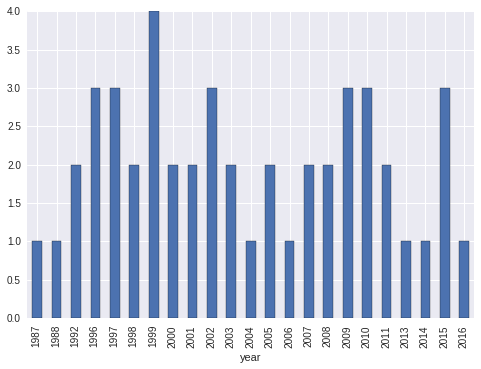

In [24]:
c.groupby(['year']).size().plot(kind='bar', ylim = 0)

In [125]:
#c.groupby(['year'])['n'].size()
c.groupby(['year'])['n'].mean()

year
1987    15.000000
1988     2.000000
1992    14.000000
1996     1.500000
1997     1.666667
1998     7.500000
1999     6.000000
2000     1.000000
2001    18.500000
2002    11.000000
2003    11.500000
2004     3.000000
2005     8.500000
2006     1.000000
2007     3.500000
2008     3.000000
2009     1.000000
2010     1.000000
2011     1.500000
2013     2.000000
2014     1.000000
2015     1.500000
2016          NaN
Name: n, dtype: float64

### Trick

Numpy array like operations on a DataFrame or Series

    h['year'] + 100

    h['year'] > 1997

Trunctating division operator `//`. The first slice (`/`) does the division and the second slice (`/`) does truncates the fraction after the number.

    h['year'] // 10

To get decade use: 
    
    h['year'] // 10 * 10

In [137]:
c.groupby(c['year'] // 10*10).size()

#Note the c['year]. First create decade and then groupby.
#c.groupby(c['year'] > 2000).size()
#c[c['year'] > 2000].groupby(by='year').size()
c.groupby([c['year'] // 10*10, 'year']).size()

year  year
1980  1987    1
      1988    1
1990  1992    2
      1996    3
      1997    3
      1998    2
      1999    4
2000  2000    2
      2001    2
      2002    3
      2003    2
      2004    1
      2005    2
      2006    1
      2007    2
      2008    2
      2009    3
2010  2010    3
      2011    2
      2013    1
      2014    1
      2015    3
      2016    1
dtype: int64

In [21]:
c = cast.set_index(['title']).sort_index()
c.groupby([c['year'] // 10*10, 'type']).size()

year  type   
1890  actor           8
      actress         1
1900  actor          54
      actress        16
1910  actor       26575
      actress     15224
1920  actor       46744
      actress     23073
1930  actor      147642
      actress     48223
1940  actor      156604
      actress     49744
1950  actor      147951
      actress     53969
1960  actor      120889
      actress     52327
1970  actor      138378
      actress     60467
1980  actor      183870
      actress     85380
1990  actor      249753
      actress    118466
2000  actor      475428
      actress    256314
2010  actor      549020
      actress    305488
2020  actor          26
      actress        13
dtype: int64

## Stack and Unstack


    vertical (row) = unstack (up)
    horizont (col) = stack (side)

In [55]:
c = cast
c = c[(c['character'] == 'Kermit the Frog') | (c['character'] == 'Oscar the Grouch')]
g = c.groupby(['character', c.year// 10*10]).size()
g

character         year
Kermit the Frog   1970    1
                  1980    4
                  1990    2
                  2000    1
                  2010    1
Oscar the Grouch  1980    1
                  1990    1
                  2000    1
dtype: int64

In [57]:
g.unstack(0)

character,Kermit the Frog,Oscar the Grouch
year,,
1970,1,NaN
1980,4,1
1990,2,1
2000,1,1
2010,1,NaN
